In [10]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.mlab   as mlab

In [11]:
# Listas

mylista = [3.15,2.35,6.89,4.52,3.32]
print(mylista)

[3.15, 2.35, 6.89, 4.52, 3.32]


In [3]:
print(mylista[1], mylista[-1], mylista[-3], mylista[:])

(2.35, 3.32, 6.89, [3.15, 2.35, 6.89, 4.52, 3.32])


In [16]:
print(mylista[0:2], mylista[:2])

([3.15, 2.35], [3.15, 2.35])


In [14]:
print(mylista[2:], mylista[:2])

([6.89, 4.52, 3.32], [3.15, 2.35])


In [15]:
mylista.insert(2, 5.693)
print(mylista)

[3.15, 2.35, 5.693, 6.89, 4.52, 3.32]


In [18]:
mylista.index(5.693)

2

In [19]:
file = 'data/lectura1.dat'
data = np.loadtxt(file, comments='#')

In [20]:
print(data)

[[  1.    1.    0.9]
 [  2.    2.2   7.8]
 [  3.    2.5  27.5]
 [  4.    4.4  67. ]
 [  5.    6.  130. ]]


In [21]:
tiempo = data[:,0]
x = data[:,1]
y = data[:,2]
print(tiempo)

[1. 2. 3. 4. 5.]


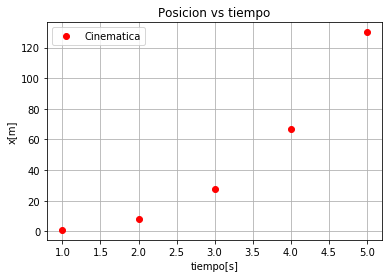

In [22]:
plt.plot(tiempo,y,'ro', label='Cinematica')
#plt.axis([0,6,0,6])

plt.title("Posicion vs tiempo")
plt.xlabel('tiempo[s]')
plt.ylabel('x[m]')
plt.grid()
plt.legend()

plt.savefig('Fig1.pdf')
plt.show()

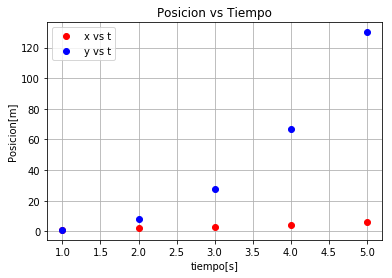

In [23]:
fig, ax = plt.subplots()
p1 = ax.plot(tiempo, x, 'ro', linewidth=2, label='x vs t')
p2 = ax.plot(tiempo, y, 'bo', linewidth=2, label='y vs t')
ax.set(xlabel = 'tiempo[s]', ylabel = 'Posicion[m]', title='Posicion vs Tiempo')
ax.grid()
ax.legend()

#plt.xlim(0.,6.)
#plt.ylim(0.,150.)


plt.show()
fig.savefig('Fig2.pdf')

In [24]:
def Funcion(t, N0_, alpha_):
    return N0_*np.exp(-t*alpha_)

In [25]:
N0 = 1000.
alpha = 0.8
# Rango de la variable independiente
t = np.linspace(0.1,2.,100)
#print(t)

In [26]:
# valores de la funcion para los numeros en el rango de t
y = np.zeros(len(t))
for i in range(len(t)):
        y[i] = Funcion(t[i], N0, alpha)

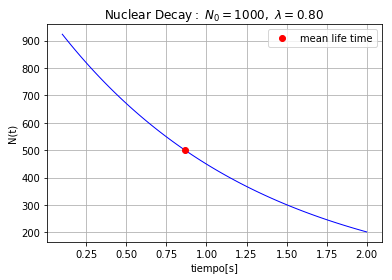

In [27]:
fig, ax = plt.subplots()
p1 = ax.plot(t, y, 'b', linewidth=1, label='')
p2 = ax.plot(np.log(2)/alpha, 0.5*N0, 'ro', linewidth=1, label='mean life time')
    
ax.set(xlabel = 'tiempo[s]', 
       ylabel = 'N(t)', 
       title ='$\mathrm{Nuclear \ Decay:} \ N_{0}=%.0f, \ \lambda=%.2f $' %(N0, alpha))

ax.grid()
ax.legend()
plt.savefig('Fig3.pdf')

In [28]:
filenames = []
mean_ = []

In [29]:
def createFig(alpha_, it):
    
    t = np.linspace(0.01, 10.,50) 
    y = np.zeros(len(t))
    
    for i in range(len(t)):
        y[i] = Funcion(t[i], N0, alpha_)
    
    mean = np.log(2)/alpha_
    mean_.append(mean)
    
    fig, ax = plt.subplots()
    p1 = ax.plot(t, y, 'b', linewidth=1, label='')
    p2 = ax.plot(mean, 0.5*N0, 'ro', linewidth=1, label='mean life time')
    
    ax.set(xlabel = 'tiempo[s]', 
           ylabel = 'N(t)', 
           title ='$\mathrm{Nuclear \ Decay: %.0f} \ N_{0}=%.0f, \ \lambda=%.2f \ \mu=%.3f$' %(it, N0, alpha_, mean))
    ax.grid()
    ax.legend()

    ##plt.show()
    filename = "Figures/%02d"%it + ".png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

In [30]:
alphatest = np.linspace(0.1,1.0,100)
print(alphatest)

num_fig = 0
for i in alphatest:
    createFig(i, num_fig)
    num_fig += 1

[0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        0.90909091
 0.918181

In [31]:
!convert Figures/* -loop 0 -delay 20 decay.gif 

In [32]:
print(mean_)

[6.931471805599452, 6.353849155132831, 5.865091527814921, 5.446156418685284, 5.083079324106266, 4.765386866349624, 4.485069991858469, 4.235899436755221, 4.012957361136525, 3.812309493079699, 3.6307709457901893, 3.465735902799726, 3.3150517331127816, 3.1769245775664157, 3.0498475944637593, 2.932545763907461, 2.823932957836814, 2.7230782093426424, 2.62917896074462, 2.541539662053133, 2.459554511664322, 2.382693433174812, 2.3104906018664844, 2.2425349959292347, 2.1784625674741136, 2.1179497183776106, 2.0607078340971348, 2.0064786805682626, 1.955030509271641, 1.9061547465398494, 1.859663167355951, 1.8153854728950947, 1.773167206083581, 1.732867951399863, 1.6943597747020887, 1.6575258665563908, 1.6222593587573189, 1.5884622887832078, 1.5560446910529384, 1.5249237972318794, 1.4950233306194898, 1.4662728819537305, 1.4386073558791317, 1.4119664789184072, 1.3862943611198906, 1.3615391046713212, 1.337652453712175, 1.3145894803723102, 1.292308302738881, 1.2707698310265665, 1.2499375387146554, 1.2

In [33]:
tmp = []

for i in range(len(mean_)):
    tmp.append([alphatest[i], mean_[i]])

Atowrite = np.array(tmp)
np.savetxt('final.dat', Atowrite, 
           fmt='%.10e', 
           delimiter=' ', 
           newline='\n' )